<hr style="border-top:10px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:10px solid Blue; margin-top: 0px; margin-bottom: 2px">

# Rediscovering Pokemon GO and the Main Series Games


<hr style="border-top:10px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:10px solid Blue; margin-top: 0px; margin-bottom: 2px">

In [1]:
# Standard imports
import pandas as pd
# Vis imports
import matplotlib.pyplot as plt
import seaborn as sns
# Stats imports
from scipy.stats import spearmanr
# Custom imports
import wrangle
import explore

## Project Goal

- To perform exploratory analysis on the Pokemon main series games and mobile game Pokemon GO

<hr style="border-top:10px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:10px solid Blue; margin-top: 0px; margin-bottom: 2px">

## Acquire and Prepare Data

<hr style="border-top:10px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:10px solid Blue; margin-top: 0px; margin-bottom: 2px">

The final dataframe df_best_attack_set is a new dataframe made from joining data from Pokemon GO and a Pokemon dataset on kaggle for the main series pokemon games.
In this dataset you will see that ER or Equivalent Rating was changed to Battle_Stat. This makes it a bit easier to follow for those not as familiar with the way stats work in the Pokemon games. If you would like further explanation please refer to the README on GitHub. 

In [2]:
# This function reads in 3 dataframes from csv's and prepares them for exploration.
df, df1, df_best_attack_set = wrangle.wrangle_df()

In [3]:
df.head()

,Pokemon,Fast Move,Charged Move,DPS,TDO,Battle_Stat,CP
0,Mega Mewtwo Y,Confusion,Psystrike,26.355,999.7,65.41,5610
1,Mega Mewtwo Y,Psycho Cut,Psystrike,26.207,994.1,65.04,5610
2,Mega Mewtwo X,Confusion,Psystrike,25.513,967.8,63.32,5429
3,Shadow Mewtwo,Confusion,Psystrike,25.400,662.7,57.41,4178
4,Mega Mewtwo X,Psycho Cut,Psystrike,25.380,962.8,62.99,5429


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13761 entries, 0 to 13760
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pokemon       13761 non-null  object 
 1   Fast Move     13761 non-null  object 
 2   Charged Move  13761 non-null  object 
 3   DPS           13761 non-null  float64
 4   TDO           13761 non-null  float64
 5   Battle_Stat   13761 non-null  float64
 6   CP            13761 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 752.7+ KB


In [5]:
df1.head()

,#,Pokemon,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
df_best_attack_set.head()

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Flabébé,7.460,99.2,41.2,1063,Vine Whip,Dazzling Gleam,669.0,Fairy,NaN,303.0,44.0,38.0,39.0,61.0,79.0,42.0,6.0,False
1,5th Anniversary Pikachu,8.366,81.2,47.5,938,Thunder Shock,Wild Charge,25.0,Electric,NaN,320.0,35.0,55.0,40.0,50.0,50.0,90.0,1.0,False
2,Abomasnow,12.094,322.3,570.1,2362,Razor Leaf,Weather Ball Ice,460.0,Grass,Ice,494.0,90.0,92.0,75.0,92.0,85.0,60.0,4.0,False
3,Abra,11.707,85.1,136.5,1342,Zen Headbutt,Psyshock,63.0,Psychic,NaN,310.0,25.0,20.0,15.0,105.0,55.0,90.0,1.0,False
4,Absol,15.134,252.4,874.8,2526,Snarl,Return,359.0,Dark,NaN,465.0,65.0,130.0,60.0,75.0,60.0,75.0,3.0,False


In [7]:
df_best_attack_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317 entries, 0 to 1316
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pokemon       1317 non-null   object 
 1   DPS           1317 non-null   float64
 2   TDO           1317 non-null   float64
 3   Battle_Stat   1317 non-null   float64
 4   Max_CP_Lv40   1317 non-null   int64  
 5   Fast_Move     1317 non-null   object 
 6   Charged_Move  1317 non-null   object 
 7   #             1115 non-null   float64
 8   Type 1        1115 non-null   object 
 9   Type 2        594 non-null    object 
 10  Total         1115 non-null   float64
 11  HP            1115 non-null   float64
 12  Attack        1115 non-null   float64
 13  Defense       1115 non-null   float64
 14  Sp. Atk       1115 non-null   float64
 15  Sp. Def       1115 non-null   float64
 16  Speed         1115 non-null   float64
 17  Generation    1115 non-null   float64
 18  Legendary     1113 non-null 

## Acquire and Prepare Takeaways

- We ended up with 3 different dataframes to look at.
- The data was not split as we are not doing any modeling for this project.
- ER was changed to Battle_Stat to make it a bit more intutive to understand.
- The dataframe best_attack_set takes the optimal moveset for the max Battle_Stat for each pokemon and joins with the data from the main series Pokemon games to get a more complete picture of the data.

<hr style="border-top:10px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:10px solid Blue; margin-top: 0px; margin-bottom: 2px">

## Exploration

<hr style="border-top:10px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:10px solid Blue; margin-top: 0px; margin-bottom: 2px">

## Lets make a function that will take in a pokemon name and return its stats with the optimal moveset for the highest battle stat.

In [9]:
explore.find_best_moveset(df_best_attack_set)

Type a Pokemons name to find its best moveset. Charmander


        Pokemon    DPS   TDO  Battle_Stat  Max_CP_Lv40 Fast_Move  \
135  Charmander  7.529  75.0         32.0          980   Scratch   

     Charged_Move    # Type 1 Type 2  Total    HP  Attack  Defense  Sp. Atk  \
135  Flamethrower  4.0   Fire    NaN  309.0  39.0    52.0     43.0     60.0   

     Sp. Def  Speed  Generation Legendary  
135     50.0   65.0         1.0     False  


Would you like to check another Pokemon? Y/N Y
Type a Pokemons name to find its best moveset. Lugia


    Pokemon     DPS    TDO  Battle_Stat  Max_CP_Lv40     Fast_Move  \
510   Lugia  16.186  912.7       3870.5         3703  Extrasensory   

    Charged_Move      #   Type 1  Type 2  Total     HP  Attack  Defense  \
510  Aeroblast++  249.0  Psychic  Flying  680.0  106.0    90.0    130.0   

     Sp. Atk  Sp. Def  Speed  Generation Legendary  
510     90.0    154.0  110.0         2.0      True  


Would you like to check another Pokemon? Y/N n


Please enter Y or N


Would you like to check another Pokemon? Y/N N


Thank you have a great day!


## Its not perfect but it works!!

## This could be used as the fondation to develop an app that can assist new and professional level players for Pokemon Go.

## What pokemon has the highest and lowest cp?

In [8]:
df_best_attack_set[df_best_attack_set.Max_CP_Lv40 == df_best_attack_set.Max_CP_Lv40.max()]

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
272,Eternamax Eternatus,14.836,2500.2,8164.7,8187,Dragon Tail,Hyper Beam,890.0,Poison,Dragon,1125.0,255.0,115.0,250.0,125.0,250.0,130.0,8.0,True


In [9]:
df_best_attack_set[df_best_attack_set.Max_CP_Lv40 == df_best_attack_set.Max_CP_Lv40.min()]

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
281,Feebas,2.333,16.2,0.2,274,Tackle,Mirror Coat,349.0,Water,NaN,200.0,20.0,15.0,20.0,10.0,55.0,80.0,3.0,False
526,Magikarp,1.630,11.3,0.0,274,Splash,Return,129.0,Water,NaN,200.0,20.0,10.0,55.0,15.0,20.0,80.0,1.0,False
527,Magikarp,1.630,11.3,0.0,274,Splash,Struggle,129.0,Water,NaN,200.0,20.0,10.0,55.0,15.0,20.0,80.0,1.0,False
945,Shadow Magikarp,1.336,7.7,0.0,274,Splash,Struggle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
946,Shadow Magikarp,1.336,7.7,0.0,274,Splash,Frustration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## What "S tier pokemon" in Pokemon Go has the highest and lowest Battle Stat?


In [10]:
S_tier_attackers = ['Kartana', 'Terrakion', 'Shadow Metagross', 'Shadow Machamp',
                    'Shadow Mewtwo', 'Shadow Salamence', 'Shadow Dragonite', 'Mega Latios',
                    'Mega Gengar', 'Mega Charizard Y', 'Shadow Mamoswine']

In [11]:
df_S_tier_attackers = df_best_attack_set[(df_best_attack_set.Pokemon == 'Kartana') | (df_best_attack_set.Pokemon == 'Terrakion') |
                  (df_best_attack_set.Pokemon == 'Shadow Metagross') | (df_best_attack_set.Pokemon == 'Shadow Machamp') |
                  (df_best_attack_set.Pokemon == 'Shadow Mewtwo') | (df_best_attack_set.Pokemon == 'Shadow Salamence') |
                  (df_best_attack_set.Pokemon == 'Shadow Dragonite') | (df_best_attack_set.Pokemon == 'Mega Latios') |
                  (df_best_attack_set.Pokemon == 'Shadow Gengar') | (df_best_attack_set.Pokemon == 'Mega Charizard Y') |
                  (df_best_attack_set.Pokemon == 'Shadow Mamoswine')]

In [12]:
df_S_tier_attackers

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
458,Kartana,20.374,428.9,3627.7,3677,Razor Leaf,Leaf Blade,798.0,Grass,Steel,570.0,59.0,181.0,131.0,59.0,31.0,109.0,7.0,False
566,Mega Charizard Y,21.764,758.0,7814.8,4455,Fire Spin,Blast Burn,6.0,Fire,Flying,634.0,78.0,104.0,78.0,159.0,115.0,100.0,1.0,False
578,Mega Latios,20.704,829.4,7360.9,5007,Dragon Breath,Psychic,381.0,Dragon,Psychic,700.0,80.0,130.0,100.0,160.0,120.0,110.0,3.0,True
870,Shadow Dragonite,20.854,575.4,5218.5,3792,Dragon Tail,Outrage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
942,Shadow Machamp,19.650,439.0,3330.3,3056,Counter,Dynamic Punch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
953,Shadow Mamoswine,20.377,487.6,4125.6,3328,Mud Slap,Avalanche,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961,Shadow Metagross,21.763,627.0,6462.6,3791,Bullet Punch,Meteor Mash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
963,Shadow Mewtwo,25.400,662.7,10859.6,4178,Confusion,Psystrike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,Shadow Salamence,22.163,541.8,5898.5,3749,Dragon Tail,Outrage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1191,Terrakion,19.461,626.2,4615.8,3698,Double Kick,Sacred Sword,639.0,Rock,Fighting,580.0,91.0,129.0,90.0,72.0,90.0,108.0,5.0,True


In [13]:
df_S_tier_attackers[df_S_tier_attackers.Battle_Stat == df_S_tier_attackers.Battle_Stat.max()]

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
963,Shadow Mewtwo,25.4,662.7,10859.6,4178,Confusion,Psystrike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_S_tier_attackers[df_S_tier_attackers.Battle_Stat == df_S_tier_attackers.Battle_Stat.min()]

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
942,Shadow Machamp,19.65,439.0,3330.3,3056,Counter,Dynamic Punch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## What pokemon has the highest and lowest average battle stat between all of their move sets?

In [15]:
df.groupby('Pokemon').mean('Battle_Stat').nlargest(1, columns = 'Battle_Stat')


,DPS,TDO,Battle_Stat,CP
Pokemon,,,,
Mega Mewtwo Y,21.9695,833.38125,54.524375,5610.0


In [16]:
df.groupby('Pokemon').mean('Battle_Stat').nsmallest(1, columns = 'Battle_Stat')

,DPS,TDO,Battle_Stat,CP
Pokemon,,,,
Shadow Magikarp,0.9635,5.55,1.495,274.0


## What primary type has the highest average total stats?

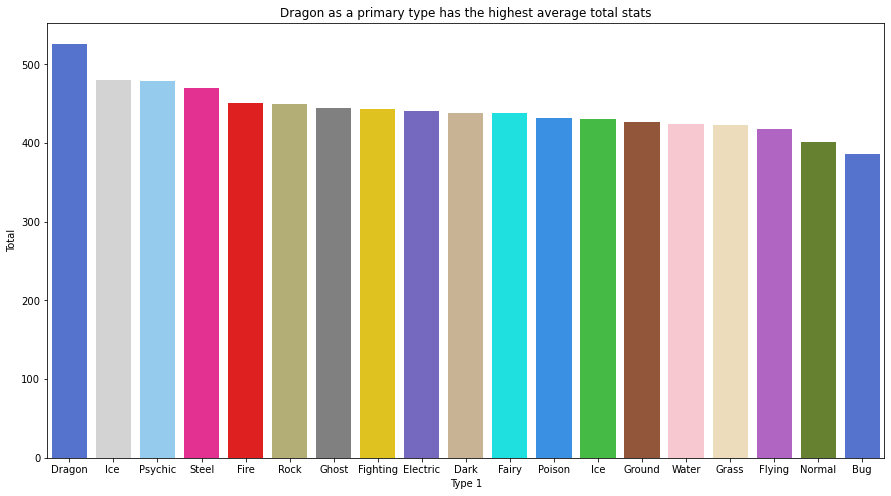

In [17]:
explore.pri_type_avg_stats(df_best_attack_set)

## Lets compare the highest and lowest average total stats. (Dragon vs Bug)

In [18]:
# dragon=df_best_attack_set[(df_best_attack_set['Type 1']=='Dragon') | ((df_best_attack_set['Type 2'])=="Dragon")] 
# bug=df_best_attack_set[(df_best_attack_set['Type 1']=='Bug') | ((df_best_attack_set['Type 2'])=="Bug")]
# plt.scatter(dragon.Attack.head(100),dragon.Defense.head(100),c='mediumblue',label='Dragon',marker="*",s=25)
# plt.scatter(bug.Attack.head(100),bug.Defense.head(100),c='olivedrab',label="Bug",s=20)
# plt.xlabel("Attack")
# plt.ylabel("Defense")
# dragon_avg_attack = dragon.Attack.mean()
# dragon_avg_defense = dragon.Defense.mean()
# plt.axhline(dragon_avg_attack, label='Dragon Attack Average', c = 'royalblue')
# plt.axvline(dragon_avg_defense, label='Dragon Defense Average', c = 'royalblue')
# bug_avg_attack = bug.Attack.mean()
# bug_avg_defense = bug.Defense.mean()
# plt.axhline(bug_avg_attack, label='Bug Attack Average', c = 'yellowgreen')
# plt.axvline(bug_avg_defense, label='Bug Defense Average', c = 'yellowgreen')
# plt.legend()
# plt.plot()
# fig=plt.gcf()  #get the current figure using .gcf()
# fig.set_size_inches(12,6) #set the size for the figure
# plt.show()

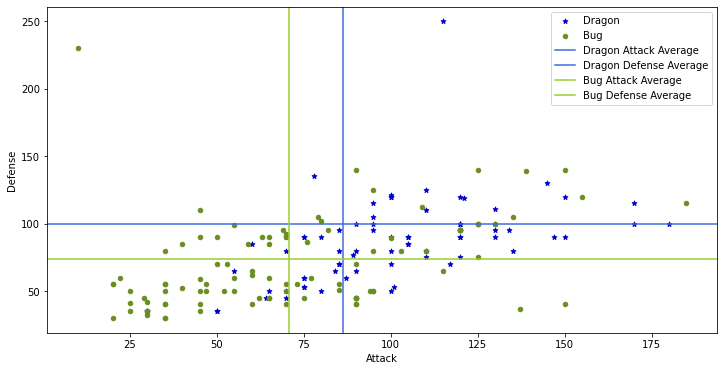

In [19]:
explore.dragon_vs_bug_atk_def_vis(df_best_attack_set)

In [20]:
plt.scatter(dragon['Sp. Atk'].head(100),dragon['Sp. Def'].head(100),c='mediumblue',label='Dragon',marker="*",s=25)
plt.scatter(bug['Sp. Atk'].head(100),bug['Sp. Def'].head(100),c='olivedrab',label="Bug",s=20)
plt.xlabel("Sp. Atk")
plt.ylabel("Sp. Def")
dragon_avg_attack = dragon['Sp. Atk'].mean()
dragon_avg_defense = dragon['Sp. Def'].mean()
plt.axhline(dragon_avg_attack, label='Dragon Sp. Atk Average', c = 'royalblue')
plt.axvline(dragon_avg_defense, label='Dragon Sp. Def Average', c = 'royalblue')
bug_avg_attack = bug['Sp. Atk'].mean()
bug_avg_defense = bug['Sp. Def'].mean()
plt.axhline(bug_avg_attack, label='Bug Sp. Atk Average', c = 'yellowgreen')
plt.axvline(bug_avg_defense, label='Bug Sp. Def Average', c = 'yellowgreen')
plt.legend()
plt.plot()
fig=plt.gcf()  #get the current figure using .gcf()
fig.set_size_inches(12,6) #set the size for the figure
plt.show()

NameError: name 'dragon' is not defined